# Laser simulation
---

- We are interest in type-0 SHG, because it exhibits the highest  nonlinear coefficient. Here, the interacting fields are all polarized along the z-axis of the crystal.
- The refractive index along the crystal’s z-axis is calculated using the Sellmeier equations for KTP

\begin{equation}
n_{2}(\lambda) = \sqrt{a_{k} + \frac{b_{k}}{1 - \frac{c_{k}}{\lambda^{2}}} 
                  + \frac{d_{k}}{1 - \frac{e_{k}}{\lambda^{2}}} 
                  - f_{k}\lambda^{2}}
\end{equation}

where the coefficients read $a_k = 2.12725$, $b_k = 1.18431$, $c_k = 5.14852 \times 10^2$, $dk = 0.6603$, $e_k = 100.00507$ and $f_k = 9.68956 \times 10^3$ and where λ is in μm. WHERE DOES THESE COEFFICIENTES COME FROM?????

- The poling period, denoted as $\Lambda$, is a crucial parameter for achieving quasi-phase matching in the crystal. 

\begin{equation}
\Lambda = \frac{\pi c}{\omega_{0}} \left( n_{2\omega}(2\omega_{0}) - n_{\omega}(\omega_{0}) \right) = 3.19 \mu m
\end{equation}


\begin{equation}
A_{2\omega}(\omega) = \underbrace{\frac{i\omega_{0} \chi^{(2)} L}{n_{2\omega} c}}_{\text{Coupling coefficient}} 
F(\omega) 
G_{m} 
\underbrace{\Phi(\omega)}_{\text{Phase matching term}}
\end{equation}

Para modelar el campo de entrada $F(\omega)$ asumimos una distribución gaussiana centrada en $\omega_0$, con una anchura espectral FWHM de 44 nm. Convertimos esto a frecuencia:

\begin{equation}
    \sigma_{\lambda} = FWHM/(2 \sqrt{2 ln⁡2})= 44e−9/2.3548 \approx 1.87e−8 
\end{equation}

\begin{equation}
    \sigma_{\omega}\approx \frac{2 \pi c}{\lambda_0^2}\sigma_{\lambda}
\end{equation}




Las funciones que se desarrollan son:

- refractive_index: Calcula n(λ).
- derivative_refractive_index_wrt_wavelength: Calcula dndλ​.
- group_refractive_index: Calcula ng(λ).
- group_velocity: Calcula vg(λ).
- delta_k: Calcula Δk(ω).
- phase_matching_function: Calcula Φ(ω).

###  Pasos para calcular el SHG

i. Definir los parámetros del sistema:

- Longitud del cristal (L=0.4 mm).
- Longitud de onda central (λ0=795 nm).
- FWHM del pulso fundamental (44 nm).
- Periodo de la rejilla (Λ=3.19 μm).
- χ(2), Gm​, y otras constantes (se normalizan para el espectro).

ii. Calcular el campo de entrada F(ω): Usar una distribución gaussiana centrada en ω0​, con un FWHM de 44 nm.

iii. Calcular $\Delta k(\omega)$: Usar delta_k para cada frecuencia ω en el rango.

iv. Calcular $\Phi(\omega)$: Usar phase_matching_function con $\Delta k(\omega)$ y $L$.

v. Calcular $n_{2\omega}$: Usar refractive_index para la frecuencia 2ω.

vi. Calcular $A_{2\omega}(\omega)$: Aplicar la ecuación 3.41, omitiendo constantes que no afectan el espectro relativo (iω0χ(2)Gm/c).

vii. Graficar el espectro de intensidad: Calcular $I_{2\omega}(\omega)=A_{2\omega}(\omega)^2$ y graficarlo en función de la longitud de onda del segundo armónico.



In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def refractive_index(lambda_or_freq , mode='wavelength'):
    """
    Calculate the refractive index of a material using the Sellmeier equation.

    Parameters
    ----------
    lambda_or_freq : float
        Input value. If mode='wavelength', this is the wavelength in micrometers.
        If mode='frequency', this is the frequency in Hz.
    mode : str, optional
        Specifies the type of input. Options are 'wavelength' (default) or 'frequency'.

    Returns
    -------
    n_lambda : float
        Refractive index of the material.

    Notes
    -----
    - Sellmeier coefficients are specific to KTP (z-axis).
    - Wavelength must be in micrometers when mode='wavelength'.
    - Valid for wavelengths between 0.4 and 2.0 micrometers.
    """
    # Coeficientes de Sellmeier para KTP
    a_k = 2.12725
    b_k = 1.18431
    c_k = 0.0514852
    d_k = 0.6603
    e_k = 100.00507
    f_k = 0.00968956

    # Convertir frecuencia a longitud de onda si es necesario
    if mode == 'frequency':
        if lambda_or_freq <= 0:
            raise ValueError("Frequency must be positive.")
        c = 299792458.0  # Velocidad de la luz (m/s)
        lambda_ = (c / lambda_or_freq) * 1e6  # Convertir de metros a micrómetros
    else:
        lambda_ = lambda_or_freq

    # Validar longitud de onda
    if lambda_ <= 0:
        raise ValueError("Wavelength must be positive.")

    # Calcular n^2 usando la ecuación de Sellmeier
    r = a_k + (b_k / (1 - (c_k / lambda_**2))) + (d_k / (1 - (e_k / lambda_**2))) - f_k * lambda_**2

    # Verificar que r sea positivo
    if r <= 0:
        raise ValueError(f"Calculated n^2 is negative ({r}). Check Sellmeier coefficients or wavelength.")

    n_lambda = np.sqrt(r)
    return n_lambda


In [3]:
# Ejemplo de uso
try:
    lambda_um = 0.795  # 795 nm = 0.795 μm
    n = refractive_index(lambda_um, mode='wavelength')
    print(f"Índice de refracción en {lambda_um} μm: {n:.4f}")

    freq = 299792458.0 / (795e-9)  # Frecuencia correspondiente a 795 nm
    n_freq = refractive_index(freq, mode='frequency')
    print(f"Índice de refracción para frecuencia {freq:.2e} Hz: {n_freq:.4f}")
except ValueError as e:
    print(f"Error: {e}")

Índice de refracción en 0.795 μm: 1.8456
Índice de refracción para frecuencia 3.77e+14 Hz: 1.8456


In [4]:
def derivative_refractive_index_wrt_wavelength(lambda_or_freq, mode='wavelength'):
    """
    Calculate the derivative of the refractive index with respect to wavelength using the Sellmeier equation.

    Parameters
    ----------
    lambda_or_freq : float
        Input value. If mode='wavelength', this is the wavelength in micrometers.
        If mode='frequency', this is the frequency in Hz.
    mode : str, optional
        Specifies the type of input. Options are 'wavelength' (default) or 'frequency'.

    Returns
    -------
    dn_dlambda : float
        Derivative of the refractive index with respect to wavelength (in micrometers^-1).

    Notes
    -----
    - Sellmeier coefficients are specific to KTP (z-axis).
    - Wavelength must be in micrometers when mode='wavelength'.
    - Valid for wavelengths between 0.4 and 2.0 micrometers.
    """
    # Coeficientes de Sellmeier (mismos que en refractive_index)
    a_k = 2.12725
    b_k = 1.18431
    c_k = 0.0514852
    d_k = 0.6603
    e_k = 100.00507
    f_k = 0.00968956

    if mode == 'frequency':
        if lambda_or_freq <= 0:
            raise ValueError("Frequency must be positive.")
        c = 299792458.0
        lambda_ = (c / lambda_or_freq) * 1e6
    else:
        lambda_ = lambda_or_freq

    if lambda_ <= 0:
        raise ValueError("Wavelength must be positive.")

    term1 = (2 * b_k * c_k * lambda_) / (lambda_**2 - c_k)**2
    term2 = (2 * d_k * e_k * lambda_) / (lambda_**2 - e_k)**2
    term3 = -2 * lambda_ * f_k
    dr_dlambda = -(term1 + term2 + term3)

    n = refractive_index(lambda_, mode='wavelength')
    den = 2 * n

    return dr_dlambda / den

In [5]:
# Ejemplo de uso
try:
    lambda_um = 0.795
    dn_dl = derivative_refractive_index_wrt_wavelength(lambda_um, mode='wavelength')
    print(f"Derivada dn/dλ en {lambda_um} μm: {dn_dl:.6f} μm^-1")

    freq = 299792458.0 / (795e-9)
    dn_dl_freq = derivative_refractive_index_wrt_wavelength(freq, mode='frequency')
    print(f"Derivada dn/dλ para frecuencia {freq:.2e} Hz: {dn_dl_freq:.6f} μm^-1")
except ValueError as e:
    print(f"Error: {e}")

Derivada dn/dλ en 0.795 μm: -0.076638 μm^-1
Derivada dn/dλ para frecuencia 3.77e+14 Hz: -0.076638 μm^-1


In [6]:
def group_refractive_index(lambda_or_freq, mode='wavelength'):
    """
    Calculate the group refractive index of a material.

    Parameters
    ----------
    lambda_or_freq : float
        Input value. If mode='wavelength', this is the wavelength in micrometers.
        If mode='frequency', this is the frequency in Hz.
    mode : str, optional
        Specifies the type of input. Options are 'wavelength' (default) or 'frequency'.

    Returns
    -------
    n_g : float
        Group refractive index of the material.

    Notes
    -----
    - Uses the Sellmeier equation for KTP (z-axis).
    - Wavelength must be in micrometers when mode='wavelength'.
    - Valid for wavelengths between 0.4 and 2.0 micrometers.
    """
    if mode == 'frequency':
        if lambda_or_freq <= 0:
            raise ValueError("Frequency must be positive.")
        c = 299792458.0
        lambda_ = (c / lambda_or_freq) * 1e6
    else:
        lambda_ = lambda_or_freq

    if lambda_ <= 0:
        raise ValueError("Wavelength must be positive.")

    n = refractive_index(lambda_, mode='wavelength')
    dn_dl = derivative_refractive_index_wrt_wavelength(lambda_, mode='wavelength')
    return n - lambda_ * dn_dl

def group_velocity(lambda_or_freq, mode='wavelength'):
    """
    Calculate the group velocity for a pulse polarized along the z-axis.

    Parameters
    ----------
    lambda_or_freq : float
        Input value. If mode='wavelength', this is the wavelength in micrometers.
        If mode='frequency', this is the frequency in Hz.
    mode : str, optional
        Specifies the type of input. Options are 'wavelength' (default) or 'frequency'.

    Returns
    -------
    v_g : float
        Group velocity in meters per second (m/s).

    Notes
    -----
    - Uses the Sellmeier equation for KTP (z-axis).
    - Wavelength must be in micrometers when mode='wavelength'.
    - Valid for wavelengths between 0.4 and 2.0 micrometers.
    """
    c = 299792458.0  # Velocidad de la luz (m/s)
    n_g = group_refractive_index(lambda_or_freq, mode=mode)
    return c / n_g

In [7]:
# Ejemplo de uso
try:
    lambda_um = 0.795  # 795 nm = 0.795 μm
    n_g = group_refractive_index(lambda_um, mode='wavelength')
    v_g = group_velocity(lambda_um, mode='wavelength')
    print(f"Índice de refracción de grupo en {lambda_um} μm: {n_g:.4f}")
    print(f"Velocidad de grupo en {lambda_um} μm: {v_g:.2e} m/s")

    freq = 3e8 / (795e-9)  # Frecuencia correspondiente a 795 nm
    n_g_freq = group_refractive_index(freq, mode='frequency')
    v_g_freq = group_velocity(freq, mode='frequency')
    print(f"Índice de refracción de grupo para frecuencia {freq:.2e} Hz: {n_g_freq:.4f}")
    print(f"Velocidad de grupo para frecuencia {freq:.2e} Hz: {v_g_freq:.2e} m/s")
except ValueError as e:
    print(f"Error: {e}")

Índice de refracción de grupo en 0.795 μm: 1.9065
Velocidad de grupo en 0.795 μm: 1.57e+08 m/s
Índice de refracción de grupo para frecuencia 3.77e+14 Hz: 1.9067
Velocidad de grupo para frecuencia 3.77e+14 Hz: 1.57e+08 m/s


In [8]:
def delta_k(freq, central_freq, Lambda=3.19e-6, m=1):
    """
    Calculate the phase mismatch for second harmonic generation (SHG) with quasi-phase matching.

    Parameters
    ----------
    freq : float
        Frequency of the fundamental wave in rad/s.
    central_freq : float
        Central frequency of the fundamental wave in rad/s.
    Lambda : float, optional
        Poling period of the material in meters (default: 3.19e-6 m for ppKTP).
    m : int, optional
        Order of quasi-phase matching (default: 1).

    Returns
    -------
    delta_k : float
        Phase mismatch in m^-1.

    Notes
    -----
    - Uses a linear approximation around the central frequency.
    - Assumes the Sellmeier equation for KTP (z-axis).
    - Frequencies must correspond to wavelengths between 0.4 and 2.0 micrometers.
    """
    if freq <= 0 or central_freq <= 0:
        raise ValueError("Frequencies must be positive.")

    # Verificar rango de validez (convertir a longitud de onda)
    c = 299792458.0
    lambda_f = 2 * np.pi * c / freq
    lambda_f0 = 2 * np.pi * c / central_freq
    if not (0.4e-6 <= lambda_f <= 2.0e-6) or not (0.4e-6 <= lambda_f0 <= 2.0e-6):
        raise ValueError("Frequencies must correspond to wavelengths between 0.4 and 2.0 micrometers.")

    # Calcular Delta k_0
    k_omega0 = central_freq * refractive_index(central_freq, mode='frequency') / c
    k_2omega0 = (2 * central_freq) * refractive_index(2 * central_freq, mode='frequency') / c
    Delta_k0 = k_2omega0 - 2 * k_omega0 - 2 * np.pi * m / Lambda

    # Calcular Delta k_1 usando velocidades de grupo
    v_g_omega0 = group_velocity(central_freq, mode='frequency')
    v_g_2omega0 = group_velocity(2 * central_freq, mode='frequency')
    Delta_k1 = (2 / v_g_2omega0) - (2 / v_g_omega0)
    Delta_k1 = (1 / v_g_2omega0) - (1 / v_g_omega0)

    # Aproximación lineal
    return Delta_k0 + Delta_k1 * (freq - central_freq)
    # return Delta_k1 * (freq - 2 * central_freq)

In [9]:
# Ejemplo de uso
try:
    omega_0 = 2 * np.pi * 3e8 / (795e-9)  # Frecuencia central (795 nm)
    omega = omega_0  # Frecuencia de prueba
    dk = delta_k(omega, omega_0)
    print(f"Desajuste de fase en omega = {omega:.2e} rad/s: {dk:.2e} m^-1")
except ValueError as e:
    print(f"Error: {e}")

Desajuste de fase en omega = 2.37e+15 rad/s: 5.85e+05 m^-1


In [10]:
def phase_matching_function(phase_mismatch, length):
    """
    Calculate the phase matching function Phi for second harmonic generation (SHG).

    Parameters
    ----------
    phase_mismatch : float
        Phase mismatch (Delta k) in m^-1.
    length : float
        Length of the nonlinear medium in meters.

    Returns
    -------
    phi : float
        Phase matching function value, Phi = sin(a)/a, where a = Delta k * L / 2.

    Notes
    -----
    - Uses the unnormalized sinc function: sinc(x) = sin(x)/x.
    - Handles the case where Delta k * L / 2 = 0, where Phi = 1.
    """
    if length <= 0:
        raise ValueError("Length of the medium must be positive.")

    a = phase_mismatch * length / 2

    # Manejar el caso a = 0
    if np.abs(a) < 1e-10:  # Umbral pequeño para evitar división por cero
        return 1.0
    else:
        return np.sin(a) / a

In [11]:
# Ejemplo de uso
try:
    Delta_k = 0.0  # Desajuste de fase (m^-1)
    L = 0.4e-3  # Longitud del cristal (0.4 mm)
    phi = phase_matching_function(Delta_k, L)
    print(f"Función de concordancia de fase para Delta k = {Delta_k:.2e} m^-1 y L = {L:.2e} m: {phi:.4f}")
except ValueError as e:
    print(f"Error: {e}")

Función de concordancia de fase para Delta k = 0.00e+00 m^-1 y L = 4.00e-04 m: 1.0000


In [12]:
# Parámetros del sistema
c = 299792458.0                        # Velocidad de la luz (m/s)
lambda_0 = 795e-9                      # Longitud de onda central (m)
omega_0 = 2 * np.pi * c / lambda_0     # Frecuencia central (rad/s)    omega = 23.71 PHz
L = 0.4e-3                             # Longitud del cristal (m)
Lambda = 3.19e-6                       # Periodo de la rejilla (m)
FWHM_lambda = 44e-9                    # Ancho espectral del pulso (m)
G_m = 1.0                              # Factor geométrico (simplificado)

# Rango de frecuencias omega (fundamental)
sigma_lambda = FWHM_lambda / (2 * np.sqrt(2 * np.log(2)))
sigma_omega = (2 * np.pi * c / lambda_0**2) * sigma_lambda
omega = np.linspace(omega_0 - 5*sigma_omega, omega_0 + 5*sigma_omega, 2000)
lambda_nm = (2 * np.pi * c / omega) * 1e9  # Longitud de onda en nm

# Campo de entrada (gaussiano)
F_omega = np.exp(-((omega - omega_0)**2) / (2 * sigma_omega**2))
I_omega = F_omega**2

# Calcular Delta k(omega)
Delta_k = np.array([delta_k(freq=w, central_freq=omega_0) for w in omega])

# Calcular Phi(w)
Phi = np.array([phase_matching_function(phase_mismatch=dk, length=L) for dk in Delta_k])

# Calcular n_2omega
n_2omega = np.array([refractive_index(lambda_or_freq=2*w, mode='frequency') for w in omega])

# Calcular A_2omega (omitimos constantes que no afectan el espectro relativo)
A_2omega = (L / n_2omega) * F_omega * G_m * Phi

# Intensidad normalizada
I_2omega = np.abs(A_2omega)**2
I_2omega /= np.max(I_2omega)  # Normalizar

# Calcular FWHM del espectro
# Longitud de onda del segundo armónico (nm)
lambda_sh = (np.pi * c / omega) * 1e9
half_max = np.max(I_2omega) / 2
indices = np.where(I_2omega >= half_max)[0]
FWHM_nm = abs(lambda_sh[indices[-1]] - lambda_sh[indices[0]])

In [13]:
# def pooling_():
    

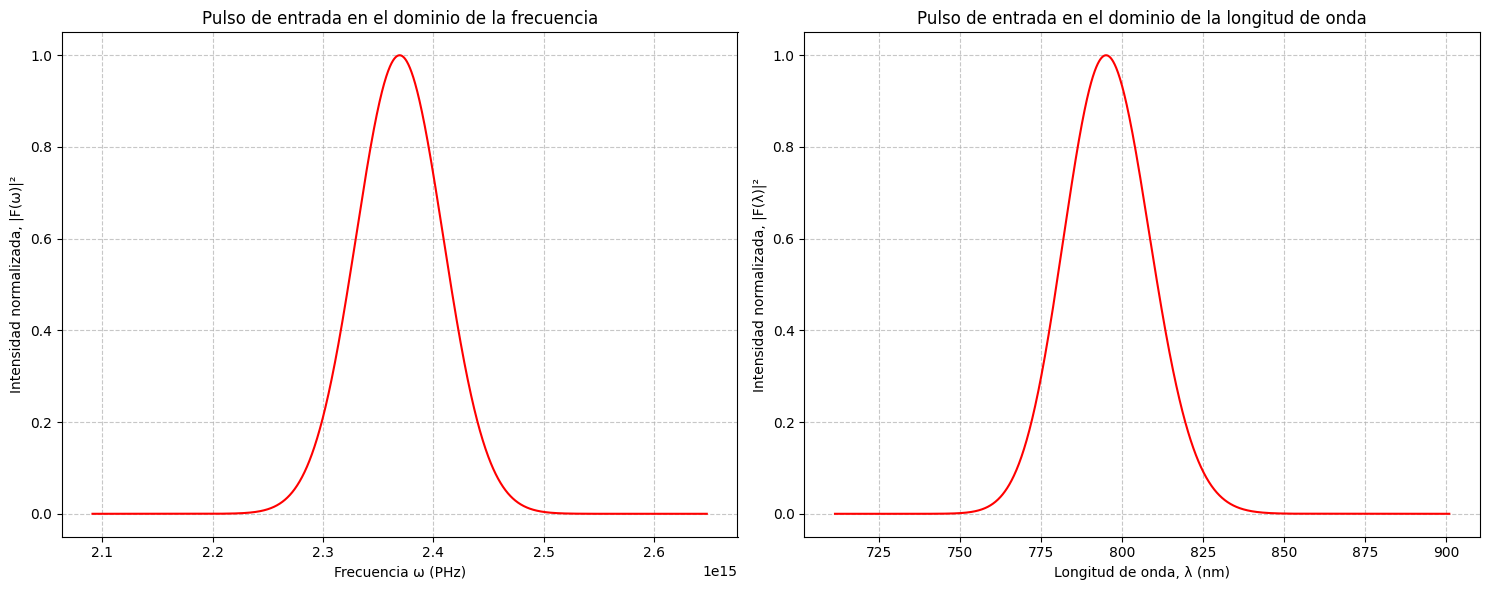

FWHM en longitud de onda: -30.95 nm
FWHM en frecuencia: 9.22e+13 rad/s


In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica (a): Pulso de entrada vs omega
axs[0].plot(omega, I_omega, color='red', linestyle='-')
axs[0].set_ylabel('Intensidad normalizada, |F(ω)|²')
axs[0].set_xlabel('Frecuencia ω (PHz)')
axs[0].set_title('Pulso de entrada en el dominio de la frecuencia')
axs[0].grid(True, which="both", linestyle='--', alpha=0.7)  # Agregar grid

# Gráfica (a): Pulso de entrada vs longitud de onda
axs[1].plot(lambda_nm, I_omega, color='red', linestyle='-')
axs[1].set_ylabel('Intensidad normalizada, |F(λ)|²')
axs[1].set_xlabel('Longitud de onda, λ (nm)')
axs[1].set_title('Pulso de entrada en el dominio de la longitud de onda')
axs[1].grid(True, which="both", linestyle='--', alpha=0.7)  # Agregar grid

plt.tight_layout()
plt.show()

# Calcular FWHM en longitud de onda
half_max = np.max(I_omega) / 2
indices = np.where(I_omega >= half_max)[0]
FWHM_lambda_calc = lambda_nm[indices[-1]] - lambda_nm[indices[0]]
print(f"FWHM en longitud de onda: {FWHM_lambda_calc:.2f} nm")

# Calcular FWHM en frecuencia
half_max = np.max(I_omega) / 2
indices = np.where(I_omega >= half_max)[0]
FWHM_omega = omega[indices[-1]] - omega[indices[0]]
print(f"FWHM en frecuencia: {FWHM_omega:.2e} rad/s")


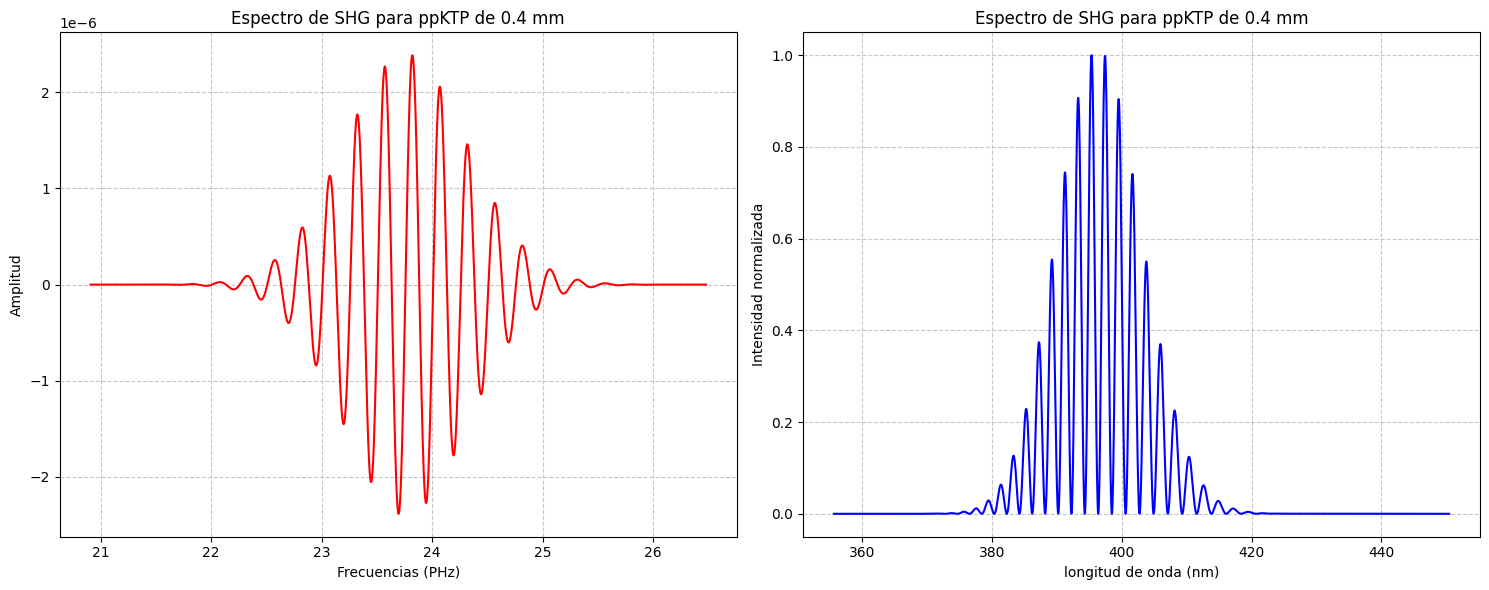

FWHM simulado: 14.88 nm


In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica (a): Amplitud
axs[0].plot(omega * 1e-14, A_2omega, color='red', linestyle='-')
axs[0].set_ylabel('Amplitud')
axs[0].set_xlabel('Frecuencias (PHz)')
axs[0].set_title('Espectro de SHG para ppKTP de 0.4 mm')
axs[0].grid(True, which="both", linestyle='--', alpha=0.7)  # Agregar grid

# Gráfica (b): Intensidad
# axs[2].plot(2 * omega * 1e-14, I_2omega, color='blue', linestyle='-')
axs[1].plot(lambda_sh, I_2omega, color='blue', linestyle='-')
axs[1].set_ylabel('Intensidad normalizada')
axs[1].set_xlabel('longitud de onda (nm)')
axs[1].set_title('Espectro de SHG para ppKTP de 0.4 mm')
axs[1].grid(True, which="both", linestyle='--', alpha=0.7)  # Agregar grid

plt.tight_layout()
plt.show()

print(f"FWHM simulado: {FWHM_nm:.2f} nm")

In [16]:
lambda_0 = 795e-9                              # (m)
delta_wl = (44e-9)                             # (m)
sigma_wl = delta_wl / (2*np.sqrt(2*np.log(2)))   # std
lambda_range = np.linspace(lambda_0 - 5*sigma_wl, lambda_0 + 5*sigma_wl, 1000)

In [17]:
def gaussian_beam(wl, wl_0, sigma_wl):
    return np.exp(-(wl-wl_0)**2/(2*sigma_wl**2))

A_input = gaussian_beam(lambda_range, lambda_0, sigma_wl)

In [18]:
FWHM = sigma_wl * (2*np.sqrt(2*np.log(2)))
FWHM

np.float64(4.4e-08)

In [19]:
limit_index_FWHM = np.where(A_input >= 0.5)[0]

In [20]:
abs(lambda_range[limit_index_FWHM[0]] - lambda_range[limit_index_FWHM[-1]])

np.float64(4.3953890965856366e-08)

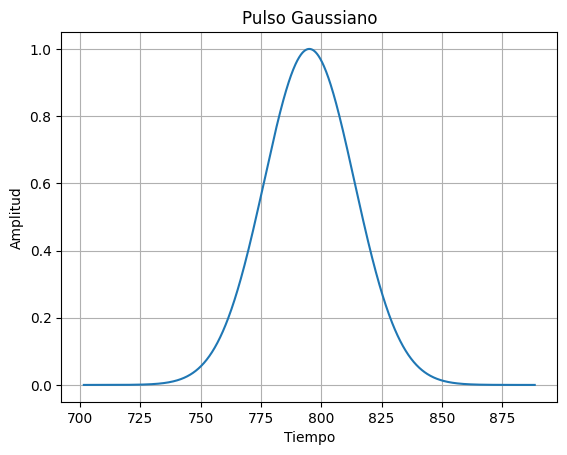

In [21]:
plt.plot(lambda_range * 1e9, A_input)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Pulso Gaussiano')
plt.grid(True)
plt.show()

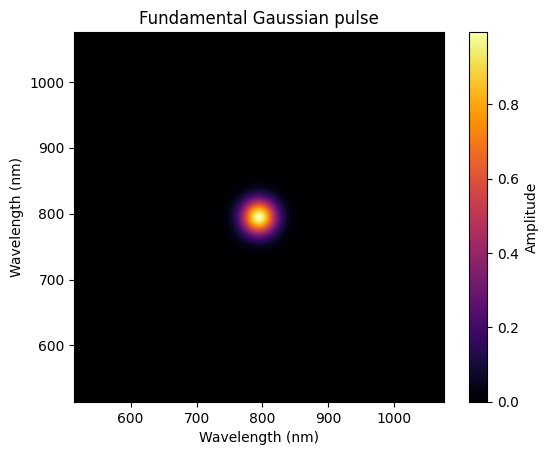

In [22]:
# Parámetros del pulso
x0, y0 = 795e-9, 795e-9    # Centro del pulso
sigma = 1.869e-8        # Ancho del pulso
A = 1            # Amplitud

# Crear una malla 2D
times_sigma = 15
x = np.linspace(x0-times_sigma*sigma, x0+times_sigma*sigma, 200)
y = np.linspace(y0-times_sigma*sigma, y0+times_sigma*sigma, 200)
X, Y = np.meshgrid(x, y)

# Función gaussiana 2D: A * exp(-((x-x0)^2 + (y-y0)^2) / (2*sigma^2))
pulse_2d = A * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))

# Graficar como mapa de calor
plt.imshow(pulse_2d, cmap='inferno', origin='lower', 
           extent=[(x0-times_sigma*sigma) * 1e9, (x0+times_sigma*sigma) * 1e9, (x0-times_sigma*sigma) * 1e9, (x0+times_sigma*sigma) * 1e9])
plt.colorbar(label='Amplitude')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Wavelength (nm)')
plt.title('Fundamental Gaussian pulse')
plt.show()